In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.stats.outliers_influence import OLSInfluence
data_path = "C:\\Users\\nlp\\Desktop\\통계학 수업\\HW8\\"

1. Allen Cognitive Level (ACL) Study를 진행하는 연구자들은 ACL test 점수와 정신병리학적 수준과의 관계를 알아보기 위해 아래의 변수들을 측정하였다. 

        Response y = ACL test score
        Predictor x1 = vocabulary (Vocab) score on the Shipley Institute of Living Scale
        Predictor x2 = abstraction (Abstract) score on the Shipley Institute of Living Scale
        Predictor x3 = score on the Symbol-Digit Modalities Test (SDMT)

1-a. 23명의 환자들에 대한 데이터인 `allentestn23.txt`를 사용하여 Scatterplot matrix를 그리고 회귀모형을 적합하기에 적당한지 확인하시오. 어떤 문제가 발생할 것으로 예상되는가? 

In [2]:
test23 = pd.read_table(data_path + 'allentestn23.txt', sep="\t", index_col=0)

In [3]:
test23.head()

,ACL,SDMT,Vocab,Abstract
Subj,,,,
6,4.5,23,24,24
8,5.9,50,18,14
10,4.8,27,14,8
15,4.5,26,15,10
17,5.9,42,30,32


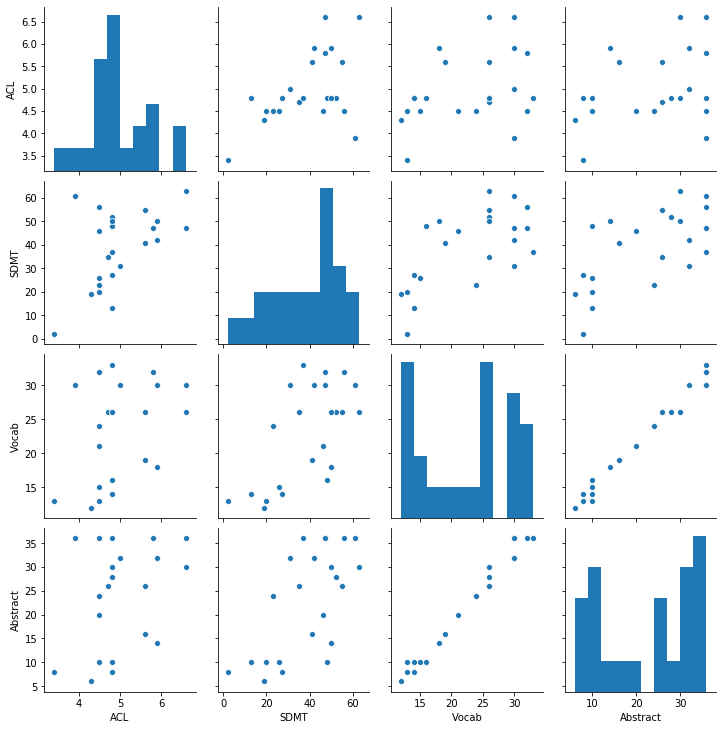

In [4]:
sns.pairplot(test23)
plt.show()
# row_1 : y(ACL), x(SDMT, Vocab, Abstract)
# x와 y 간의 뚜렷한 선형관계를 보여주었으면 좋겠다. 
# 다른 다중공정성
# Vocab - Abstract 간이 선형관계가 있다. --> 이것이 문제다. 
# 

1-b. `allentestn23.txt`데이터로 회귀모형을 적합하고 다중공선성의 문제가 발생하는지 파악하시오. 어느 변수들 간의 문제가 발생하는가? 

In [5]:
model = smf.ols('ACL~SDMT+Vocab+Abstract', data = test23).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ACL   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2.278
Date:                Wed, 25 Nov 2020   Prob (F-statistic):              0.112
Time:                        18:58:50   Log-Likelihood:                -23.338
No. Observations:                  23   AIC:                             54.68
Df Residuals:                      19   BIC:                             59.22
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7471      1.342      2.791      0.012       0.937       6.557
SDMT           0.0233      0.013      1.827      0.083      -0.003       0.050
Vocab          0.0283      0.152      0.185      0.855      -0.291       0.347
Abstract      -0.0138      0.101     -0.137      0.892      -0.224       0.197
==============================================================================
Omnibus:                        0.553   Durbin-Watson:                   1.470
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.049
Skew:                          -0.098   Prob(JB):                        0.976
Kurtosis:                       3.111   Cond. No.                         474.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# Vocab과 Abstract P-value가 높다. 

In [7]:
import patsy
y, X = patsy.dmatrices('ACL~SDMT+Vocab+Abstract', test23, return_type='matrix')

In [8]:
X

DesignMatrix with shape (23, 4)
  Intercept  SDMT  Vocab  Abstract
          1    23     24        24
          1    50     18        14
          1    27     14         8
          1    26     15        10
          1    42     30        32
          1    35     26        26
          1    41     19        16
          1    13     14        10
          1    46     21        20
          1    52     26        28
          1    55     26        26
          1    48     16        10
          1    47     32        36
          1    50     26        30
          1    31     30        32
          1    61     30        36
          1    19     12         6
          1     2     13         8
          1    56     32        36
          1    37     33        36
          1    20     13        10
          1    63     26        30
          1    47     30        36
  Terms:
    'Intercept' (column 0)
    'SDMT' (column 1)
    'Vocab' (column 2)
    'Abstract' (column 3)

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 76.84316917575055
VIF of SDMT : 1.7261852740005998
VIF of Vocab : 49.286238682129245
VIF of Abstract : 50.60308486118107


In [10]:
# 50이 나와 다중 공선성이 존재 

1-3. 본 연구에서는 위에서 문제가 된 두 변수를 모형에 포함시켜야 하는 과학적 이유가 존재하여 데이터를 더 모으기로 결정하였다. `allentest.txt` 데이터를 사용하여 위의 과정을 반복하고 다중공선성 문제가 해소되었는지 확인하시오. 

In [11]:
## 다중공선성을 해결하기 위한 데이터를 수집하는 것도 하나의 방법, 하지만 꼭 그게 다중공선성을 해결하지 않는다.
test = pd.read_table(data_path + 'allentest.txt', sep="\t", index_col=0)

In [12]:
test.head()

,ACL,Vocab,Abstract,SDMT
Subj,,,,
1,6.0,28,36,70
2,5.4,34,32,49
3,4.7,19,8,28
4,4.8,32,28,47
5,4.9,22,4,29


In [13]:
test.shape

(69, 4)

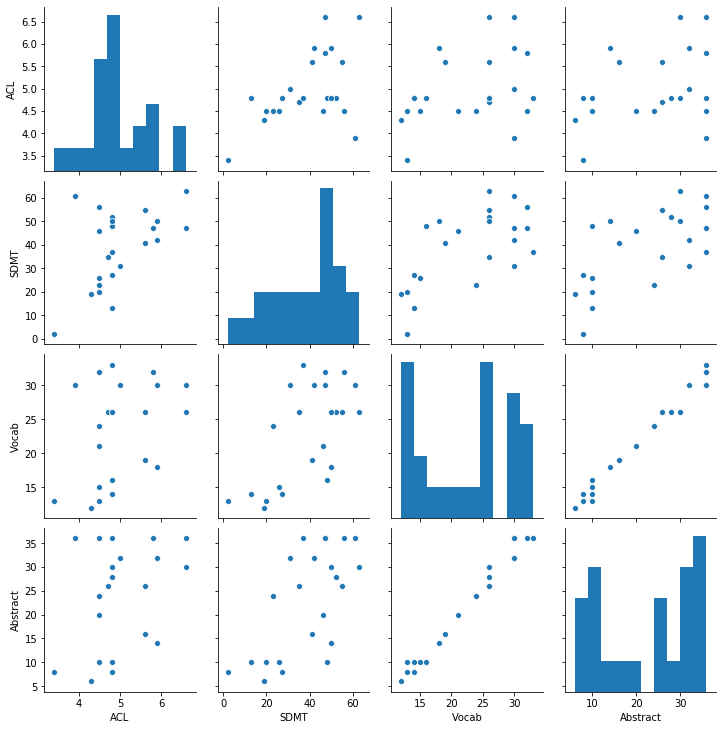

In [14]:
sns.pairplot(test23)
plt.show()

In [15]:
model = smf.ols('ACL~SDMT+Vocab+Abstract', data = test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ACL   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     8.668
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           6.41e-05
Time:                        18:58:54   Log-Likelihood:                -70.022
No. Observations:                  69   AIC:                             148.0
Df Residuals:                      65   BIC:                             157.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9463      0.338     11.673      0.000       3.271       4.622
SDMT           0.0274      0.007      3.823      0.000       0.013       0.042
Vocab         -0.0174      0.018     -0.962      0.339      -0.053       0.019
Abstract       0.0122      0.012      1.051      0.297      -0.011       0.035
==============================================================================
Omnibus:                        0.343   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.458
Skew:                           0.153   Prob(JB):                        0.795
Kurtosis:                       2.744   Cond. No.                         227.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
import patsy
y, X = patsy.dmatrices('ACL~SDMT+Vocab+Abstract', test, return_type='matrix')

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 16.670443334584185
VIF of SDMT : 1.6096624348013036
VIF of Vocab : 2.0932972330713198
VIF of Abstract : 2.1674284112401403


In [18]:
# 다중공선성이 해결됨이 보인다. 

2\. Infection.csv는 병원에서의 감염위험에 대한 데이터이다. 아래의 변수들을 사용하여 회귀분석을 시행하고자 한다. 


    Y = InfctRsk: infection risk in hospital
    X1 = Stay: average length of patient’s stay (in days)
    X2 = Xray: a measure of frequency of giving X-rays
    X3 = Region: indication in which of 4 U.S. regions the hospital is located: north-east(1), north-central(2), south(3), west(4).


In [19]:
infection = pd.read_csv(data_path + "infection.csv", index_col=0)

In [20]:
infection.head()

,Stay,Age,InfctRsk,Culture,Xray,Beds,MedSchool,Region,Census,Nurses,Facilities
ID,,,,,,,,,,,
1,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60.0
2,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40.0
3,8.34,56.9,2.7,8.1,74.0,107,2,3,82,54,20.0
4,8.95,53.7,5.6,18.9,122.8,147,2,4,53,148,40.0
5,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40.0


In [21]:
# 아래 회귀식은 문제가 있는데 그냥 그려본 것 (범주형 변수와 함께)
model_infection1 = smf.ols('InfctRsk~Stay+Xray+Region', data = infection).fit()
model_infection1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               InfctRsk   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     21.46
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           5.36e-11
Time:                        18:58:54   Log-Likelihood:                -166.76
No. Observations:                 113   AIC:                             341.5
Df Residuals:                     109   BIC:                             352.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0890      0.838     -1.299      0.197      -2.750       0.572
Stay           0.3384      0.064      5.301      0.000       0.212       0.465
Xray           0.0214      0.006      3.730      0.000       0.010       0.033
Region         0.1818      0.117      1.554      0.123      -0.050       0.414
==============================================================================
Omnibus:                        0.342   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.843   Jarque-Bera (JB):                0.508
Skew:                          -0.034   Prob(JB):                        0.776
Kurtosis:                       2.678   Cond. No.                         703.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# 위의 방식 회귀식은 문제가 있다. 범주형 자료 처리를 잘 못하였다. 

In [23]:
# 위 회귀식을 올바르게 하면 범주형 표시를 해서 
model_infection1 = smf.ols('InfctRsk~Stay+Xray+C(Region)', data = infection).fit()
model_infection1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               InfctRsk   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     13.90
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           1.84e-10
Time:                        18:58:54   Log-Likelihood:                -164.70
No. Observations:                 113   AIC:                             341.4
Df Residuals:                     107   BIC:                             357.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.8029      0.776     -1.035      0.303      -2.340       0.735
C(Region)[T.2]     0.1789      0.290      0.617      0.539      -0.396       0.754
C(Region)[T.3]     0.0430      0.297      0.145      0.885      -0.546       0.632
C(Region)[T.4]     0.8329      0.382      2.182      0.031       0.076       1.590
Stay               0.3493      0.064      5.471      0.000       0.223       0.476
Xray               0.0197      0.006      3.413      0.001       0.008       0.031
==============================================================================
Omnibus:                        0.014   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.032
Skew:                           0.009   Prob(JB):                        0.984
Kurtosis:                       2.919   Cond. No.                         715.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# region 변수를 카데고리 변수로 바꾸면 
infection["Region"].astype('category')

ID
1      4
2      2
3      3
4      4
5      1
      ..
109    2
110    3
111    4
112    1
113    3
Name: Region, Length: 113, dtype: category
Categories (4, int64): [1, 2, 3, 4]

In [25]:
infection['Region'] = infection["Region"].astype('category')
# 아래 회귀식은 문제가 있는데 그냥 그려본 것 (범주형 변수와 함께)
model_infection2 = smf.ols('InfctRsk~Stay+Xray+Region', data = infection).fit()
model_infection2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               InfctRsk   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     13.90
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           1.84e-10
Time:                        18:58:54   Log-Likelihood:                -164.70
No. Observations:                 113   AIC:                             341.4
Df Residuals:                     107   BIC:                             357.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.8029      0.776     -1.035      0.303      -2.340       0.735
Region[T.2]     0.1789      0.290      0.617      0.539      -0.396       0.754
Region[T.3]     0.0430      0.297      0.145      0.885      -0.546       0.632
Region[T.4]     0.8329      0.382      2.182      0.031       0.076       1.590
Stay            0.3493      0.064      5.471      0.000       0.223       0.476
Xray            0.0197      0.006      3.413      0.001       0.008       0.031
==============================================================================
Omnibus:                        0.014   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.032
Skew:                           0.009   Prob(JB):                        0.984
Kurtosis:                       2.919   Cond. No.                         715.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
## another way
infection['Region']=infection.Region.cat.rename_categories(['north-east', 'north-central', 'south', 'west'])

In [27]:
model_infection3 = smf.ols('InfctRsk~Stay+Xray+Region', data = infection).fit()
model_infection3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               InfctRsk   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     13.90
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           1.84e-10
Time:                        18:58:54   Log-Likelihood:                -164.70
No. Observations:                 113   AIC:                             341.4
Df Residuals:                     107   BIC:                             357.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.8029      0.776     -1.035      0.303      -2.340       0.735
Region[T.north-central]     0.1789      0.290      0.617      0.539      -0.396       0.754
Region[T.south]             0.0430      0.297      0.145      0.885      -0.546       0.632
Region[T.west]              0.8329      0.382      2.182      0.031       0.076       1.590
Stay                        0.3493      0.064      5.471      0.000       0.223       0.476
Xray                        0.0197      0.006      3.413      0.001       0.008       0.031
==============================================================================
Omnibus:                        0.014   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.032
Skew:                           0.009   Prob(JB):                        0.984
Kurtosis:                       2.919   Cond. No.                         715.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
##sns.pairplot(infection)
##plt.show()

2-a.	고려하고 있는 네 개의 변수 간의 산점도행렬을 확인하여라. 이상치가 발견되는가? Stay 변수를 기준으로 가장 큰 두 관측치를 제외하고 아래의 분석을 진행하기로 한다.

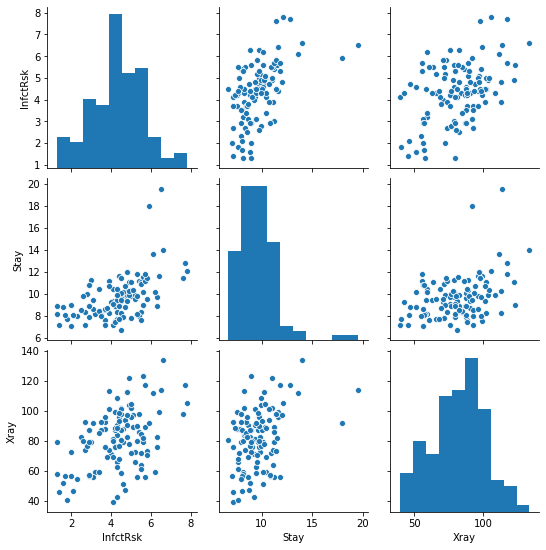

In [29]:
# Region 은 범주형 변수 따로 안 그림
# outlier 2개 
sns.pairplot(infection[['InfctRsk', 'Stay', 'Xray']])
plt.show()

In [30]:
# stay 기준으로 15보다 작은 데이터를 사용해서 

In [31]:
# 연습
import patsy
y, X = patsy.dmatrices('InfctRsk~Stay+Xray+Region', data=infection, return_type='dataframe')
X.head()

,Intercept,Region[T.north-central],Region[T.south],Region[T.west],Stay,Xray
ID,,,,,,
1,1.0,0.0,0.0,1.0,7.13,39.6
2,1.0,1.0,0.0,0.0,8.82,51.7
3,1.0,0.0,1.0,0.0,8.34,74.0
4,1.0,0.0,0.0,1.0,8.95,122.8
5,1.0,0.0,0.0,0.0,11.20,88.9


In [32]:
# 연습
model_infection3 = smf.ols('InfctRsk~Stay+Xray+Region', data = infection).fit()
model_infection3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               InfctRsk   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     13.90
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           1.84e-10
Time:                        18:58:56   Log-Likelihood:                -164.70
No. Observations:                 113   AIC:                             341.4
Df Residuals:                     107   BIC:                             357.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.8029      0.776     -1.035      0.303      -2.340       0.735
Region[T.north-central]     0.1789      0.290      0.617      0.539      -0.396       0.754
Region[T.south]             0.0430      0.297      0.145      0.885      -0.546       0.632
Region[T.west]              0.8329      0.382      2.182      0.031       0.076       1.590
Stay                        0.3493      0.064      5.471      0.000       0.223       0.476
Xray                        0.0197      0.006      3.413      0.001       0.008       0.031
==============================================================================
Omnibus:                        0.014   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.032
Skew:                           0.009   Prob(JB):                        0.984
Kurtosis:                       2.919   Cond. No.                         715.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# 연습
model_infection3 = smf.ols('InfctRsk~Stay+Xray+C(Region, Treatment(reference="west"))', data = infection).fit()
model_infection3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               InfctRsk   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     13.90
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           1.84e-10
Time:                        19:00:33   Log-Likelihood:                -164.70
No. Observations:                 113   AIC:                             341.4
Df Residuals:                     107   BIC:                             357.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
Intercept                                                   0.0300      0.635      0.047      0.962      -1.229       1.289
C(Region, Treatment(reference="west"))[T.north-east]       -0.8329      0.382     -2.182      0.031      -1.590      -0.076
C(Region, Treatment(reference="west"))[T.north-central]    -0.6540      0.341     -1.919      0.058      -1.330       0.022
C(Region, Treatment(reference="west"))[T.south]            -0.7898      0.328     -2.409      0.018      -1.440      -0.140
Stay                                                        0.3493      0.064      5.471      0.000       0.223       0.476
Xray                                                        0.0197      0.006      3.413      0.001       0.008       0.031
==============================================================================
Omnibus:                        0.014   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.032
Skew:                           0.009   Prob(JB):                        0.984
Kurtosis:                       2.919   Cond. No.                         542.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2-b.	Infection risk를 나머지 세 변수로 셜명하는 모형을 적합하여라. 각 회귀계수의 유의성을 테스트 하고 유의한 계수의 의미를 해석하시오. 

2-c. Region이 west인 지역을 reference level로 사용하여 모형을 다시 적합하고 유의한 회귀계수의 의미를 해석하시오. B의 결과와 어떻게 다른가? 